<a href="https://colab.research.google.com/github/TmTrojcak/Computational_Physics/blob/main/Tyler_Trojcak_Lab07_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [89]:
# import your modules here
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [75]:
# write your function here
def trap(y, x):
  areatotal = 0
  for i in range(1, len(x)):
    area = 0.5 * ((y[i] + y[i-1]) * (x[i] - x[i-1]))
    areatotal = areatotal + area
  return areatotal

# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [76]:
# write your function mycircle here
def mycircle(x,r=2):
  y = np.sqrt(r**2 - x**2)
  return y

### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [77]:
x = np.linspace(-2, 2, 100)
y = mycircle(x)
areatotal = trap(y, x)
print(f'The area under the circle found using the trap function is {areatotal:.5f}')

The area under the circle found using the trap function is 6.27644


### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [79]:
accepted_area = 6.283185 # Integration of np.sqrt(4-x**2) over x = -2 to 2
percent_error = (accepted_area - areatotal)/accepted_area * 100
print(f'The percent error is {percent_error:.2f}%')

The percent error is 0.11%


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**Increasing the amount of steps or trapezoids increases the accuracy greatly as the measurements become smaller and more precise to compensate with the increased number of steps.**



In [80]:
x = np.linspace(-2, 2, 1000)
y = mycircle(x)
areatotal = trap(y, x)
print(f'The area under the circle found using the trap function is {areatotal:.5f}')

accepted_area = 6.283185 # Integration of np.sqrt(4-x**2) over x = -2 to 2
percent_error = (accepted_area - areatotal)/accepted_area * 100
print(f'The percent error is {percent_error:.2f}%')

The area under the circle found using the trap function is 6.28297
The percent error is 0.00%


# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [81]:
def mygauss(x, mean, sigma):
  f = 1/(np.sqrt(2*np.pi)*sigma) * np.exp((-1/2)*((x - mean)/sigma)**2)
  return f

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [99]:
x = np.linspace(-3, 3, 1000)
mean = np.mean(x)
sigma = np.std(x)
f = mygauss(x, mean, sigma)
area = trap(f, x)
print(f'The area under the gaussian found using the trap function is {area:.5f} compared to the accepted answer of 1.00000')

The area under the gaussian found using the trap function is 0.91643 compared to the accepted answer of 1.00000


Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [100]:
x = np.linspace(-6, 6, 1000)
mean = np.mean(x)
sigma = np.std(x)
f = mygauss(x, mean, sigma)
area = trap(f, x)
print(f'The area under the gaussian found using the trap function is {area:.5f} compared to the accepted answer of 1.00000')

The area under the gaussian found using the trap function is 0.91643 compared to the accepted answer of 1.00000


Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [101]:
x = np.linspace(-9, 9, 1000)
mean = np.mean(x)
sigma = np.std(x)
f = mygauss(x, mean, sigma)
area = trap(f, x)
print(f'The area under the gaussian found using the trap function is {area:.5f} compared to the accepted answer of 1.00000')

The area under the gaussian found using the trap function is 0.91643 compared to the accepted answer of 1.00000


# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [97]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapezoid

# set up x and y arrays for the half circle
x = np.linspace(-2, 2, 100)
y = mycircle(x)

# call scipy.integrate.trapezoid to perform the integration
trapA = trapezoid(y, x)

accepted_area = 6.283185 # Integration of np.sqrt(4-x**2) over x = -2 to 2
percent_error = (accepted_area - trapA)/accepted_area * 100


# print your result and the expected answer in a formatted print statement
print(f'The area under the circle found using the trap function is {trapA:.5f}')
print(f'The percent error is {percent_error:.2f}% when compared to the actual answer of {accepted_area:.5f}')

The area under the circle found using the trap function is 6.27644
The percent error is 0.11% when compared to the actual answer of 6.28318


In [98]:
# set up x and y arrays for the gaussian
x = np.linspace(-2, 2, 1000)
mean = np.mean(x)
sigma = np.std(x)
f = mygauss(x, mean, sigma)

# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
trapAg = trapezoid(f, x)

accepted_area = 1 # Integration of np.sqrt(4-x**2) over x = -2 to 2
percent_error = (accepted_area - trapAg)/accepted_area * 100

# print your result and the expected answer in a formatted print statement
print(f'The area under the gaussian found using the trap function is {trapAg:.5f}')
print(f'The percent error is {percent_error:.2f}% when compared to the actual answer of {accepted_area:.5f}')

The area under the gaussian found using the trap function is 0.91643
The percent error is 8.36% when compared to the actual answer of 1.00000


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



In [165]:
# your monte carlo function here
def mcintegrate(visualize=False):
  xrandom = np.random.uniform(low = -2, high = 2, size = 10000)
  yrandom = np.random.uniform(low = 0, high = 2, size = 10000)
  x = np.linspace(-2, 2, 10000)
  y = mycircle(x)
  yran = mycircle(xrandom)
  areatotal = 0
  for i in range(1, len(x)):
    area = 0.5 * ((y[i] + y[i-1]) * (x[i] - x[i-1]))
    areatotal = areatotal + area
  if visualize == True:
    plt.plot(x, y, color = 'black', label = 'function', linewidth = '5')
    plt.scatter(xrandom[yrandom < yran], yrandom[yrandom < yran], color = 'blue', label = 'good')
    plt.scatter(xrandom[yrandom > yran], yrandom[yrandom > yran], color = 'red', label = 'bad')
    plt.title(f'The area under the circle is {areatotal:.5f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
  return

### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

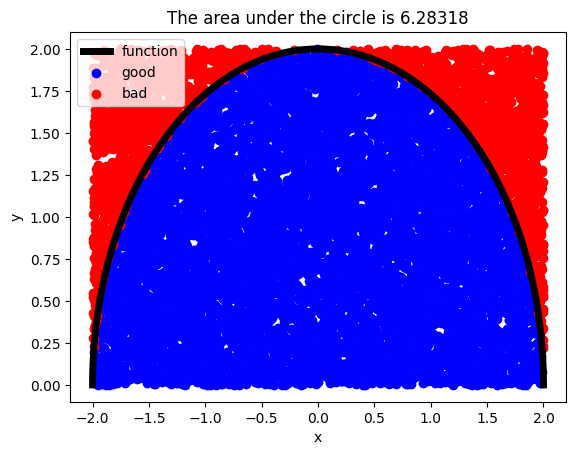

In [166]:
# your code to calculate the area of a half circle using monte carlo
mcintegrate(visualize=True)